#### Spidroin Analysis

Spidroin formation occurs in the C-terminal (CT): 359LYS

`resid 359 and resname LYS`

`resid 1 and resname GLY`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

#### RMSD calculation

In [6]:
rmsd_5 = pd.read_csv('data/spid_RMSD_pH5.dat',sep='\t',names=['ref_mol', 'ref_frame', 'mol', 'frame', 'rmsd'],skiprows=1)
rmsd_7 = pd.read_csv('data/spid_RMSD_pH7.dat',names=['frame','rmsd'],skiprows=1)

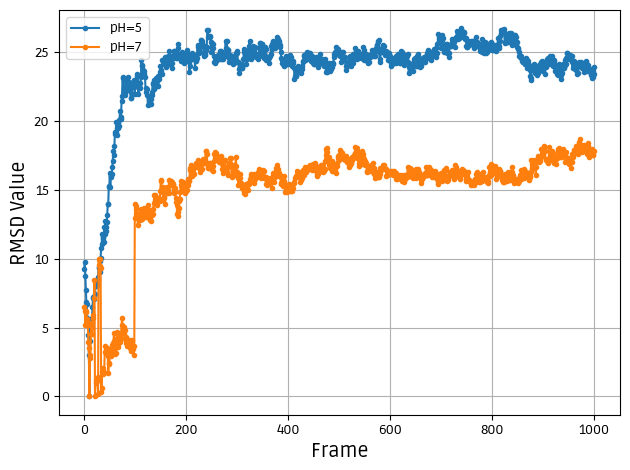

In [10]:
plt.plot(rmsd_5['frame'].iloc[:1001],rmsd_5['rmsd'].iloc[:1001],marker='.',label='pH=5')
plt.plot(rmsd_7['frame'].iloc[1:1001],rmsd_7['rmsd'].iloc[1:1001],marker='.',label='pH=7')

# plt.xlim(min(rmsd_5['frame'])-10,max(rmsd_5['frame'])+20)
# plt.ylim(min(rmsd_5['rmsd'])-0.2,max(rmsd_5['rmsd']))

plt.xlabel('Frame',fontsize=14);plt.ylabel('RMSD Value',fontsize=14)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

# plt.xlim(100,1001)

plt.tight_layout()
plt.grid()
plt.legend()
# plt.savefig('results/spid_RMSD.png',dpi=300)

plt.show()

#### Distances

Calculated from residues LYS359 and GLY1

In [3]:
distances_pH5 = pd.read_csv('data/spid_distances_pH5.dat',sep='\t',names=['Frame','Distance'])
distances_pH7 = pd.read_csv('data/spid_distances_pH7.dat',sep='\t',names=['Frame','Distance'])

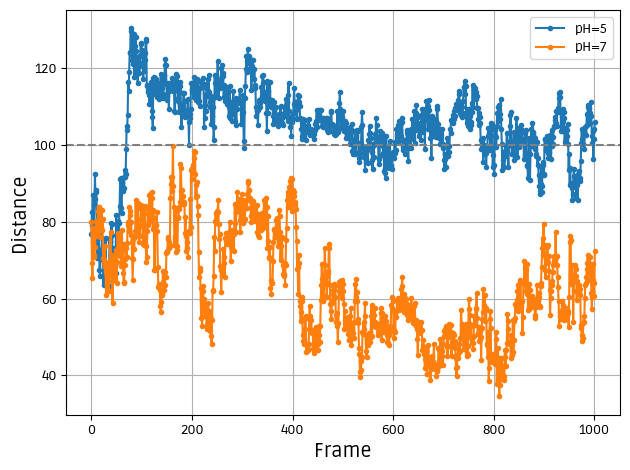

In [4]:
plt.plot(distances_pH5['Frame'],distances_pH5['Distance'],marker='.',label='pH=5')
plt.plot(distances_pH7['Frame'],distances_pH7['Distance'],marker='.',label='pH=7')

plt.axhline(y=100,color='gray',linestyle='--')

# plt.xlim(min(distances['Frame'])-10,max(distances['Frame'])+20)
# plt.ylim(min(distances['Distance'])-0.2,max(distances['Distance'])+2)

plt.xlabel('Frame',fontsize=14);plt.ylabel('Distance',fontsize=14)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('results/spid_dist.png',dpi=300)

plt.show()